In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
# Dataset loading 
dataset_location = "/content/gdrive/My Drive/LSMA_FINAL_Project/datasets/"

image_1 =  "/content/gdrive/MyDrive/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/rgb/b1-99445_Clipped.jpg"
image_nir = "/content/gdrive/MyDrive/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/nir_color/b1-99445.png"
evi_img = "/content/gdrive/MyDrive/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/evi_color/b1-99445.png"
pixel_labels = "/content/gdrive/MyDrive/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/GT_color/b1-99445_mask.png"


# image_1 =  "/content/gdrive/MyDrive/datasets_lsma/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/rgb/b1-99445_Clipped.jpg"
# image_nir = "/content/gdrive/MyDrive/datasets_lsma/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/nir_color/b1-99445.png"
# pixel_labels = "/content/gdrive/MyDrive/datasets_lsma/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/GT_color/b1-99445_mask.png"
# evi_img = "/content/gdrive/MyDrive/datasets_lsma/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/evi_color/b1-99445.png"


In [ ]:
im_rgb = cv2.imread(image_1)
im_nir = cv2.imread(image_nir)
im_gt = cv2.imread(pixel_labels)
im_evi = cv2.imread(evi_img)
print(type(im_nir))
im_evi.shape

<class 'numpy.ndarray'>


(487, 880, 3)

In [ ]:
hypercube = np.dstack((im_rgb,im_nir,im_evi,im_gt))
hypercube.shape

(1, 1, 4)

In [ ]:
hypercube[0,0,:]

array([None, None, None, None], dtype=object)

In [ ]:
im_gt[220, 1, :]


array([ 0, 60,  0], dtype=uint8)

In [ ]:
color_dict = {
    "vegetation": [51, 102, 102],
    "grass": [0, 255, 0],
    "path": [170, 170, 170],
    "sky": [255, 120,   0],
    "object": [0, 60, 0]
}

gt_dict = {
    0: [51, 102, 102],
    1: [0, 255, 0],
    2: [170, 170, 170],
    3: [255, 120,   0],
    4: [0, 60, 0]
}

In [ ]:
gt_dict

{0: [51, 102, 102],
 1: [0, 255, 0],
 2: [170, 170, 170],
 3: [255, 120, 0],
 4: [0, 60, 0]}

In [ ]:
def create_gt_for_images(segmented_image, name=None, save=False):
  gt_img = np.zeros((segmented_image.shape[0],segmented_image.shape[1]))
  for i in range(len(segmented_image[:,1,1])):
    for j in range(len(segmented_image[1,:,1])):
      idx = 0
      for el in list(gt_dict.values()):
        if all(segmented_image[i,j,:] == el):
          gt_img[i,j] = idx
        else:
          idx += 1
  if save and name is not None:
    np.save(f"/content/gdrive/MyDrive/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/gt_files/{name}",
            gt_img)
  return gt_img

def append_bands_hypercube(img, bands_to_append):
  hypercube = np.dstack((img,bands_to_append))
  print(f"Shape of hypercube is {hypercube.shape}")
  return hypercube

In [ ]:
# Hypercube creation
gt_img = create_gt_for_images(im_gt)
hypercube = append_bands_hypercube(im_rgb,im_nir)
hypercube = append_bands_hypercube(hypercube,gt_img)

hypercube = append_bands_hypercube

In [ ]:
np.unique(gt_img)

array([0., 1., 2., 3., 4.])

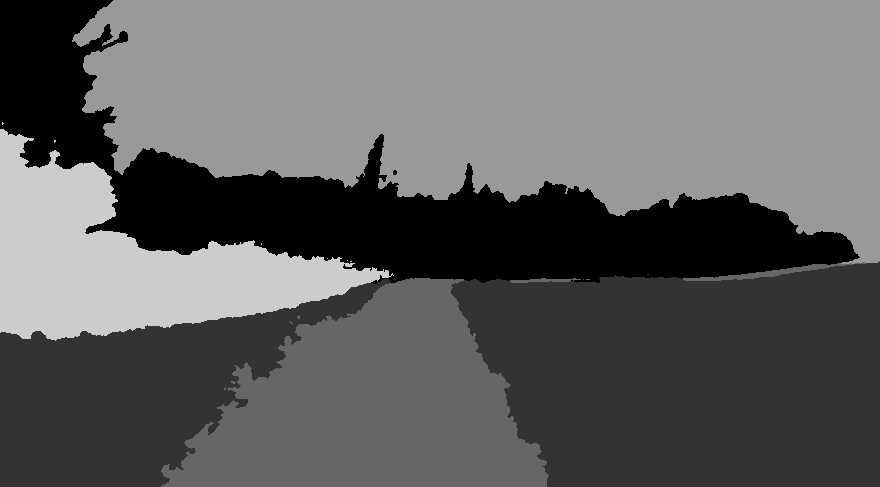

In [ ]:
from google.colab.patches import cv2_imshow
# Just ti have a better visualization we multiply to have it in range [0,255]
cv2_imshow(gt_img*(255/5))

In [ ]:
np.array([0,60,1]) == np.array(list(gt_dict.values()))

array([[False, False, False],
       [ True, False, False],
       [False, False, False],
       [False, False, False],
       [ True,  True, False]])

In [ ]:
import os
os.listdir("/content/gdrive/MyDrive/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/GT_color/")
# os.listdir("/content/gdrive/MyDrive/datasets_lsma/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/GT_color/")

['b34-1543_mask.png',
 'b875-908_mask.png',
 'b315-442_mask.png',
 'b342-855_mask.png',
 'b85-6986_mask.png',
 'b347-196_mask.png',
 'b75-0504_mask.png',
 'b241-386_mask.png',
 'b511-704_mask.png',
 'b265-606_mask.png',
 'b128-511_mask.png',
 'b314-513_mask.png',
 'b115-997_mask.png',
 'b69-8029_mask.png',
 'b24-5502_mask.png',
 'b551-215_mask.png',
 'b80-5434_mask.png',
 'b76-1042_mask.png',
 'b86-1078_mask.png',
 'b540-41_mask.png',
 'b150-659_mask.png',
 'b350-605_mask.png',
 'b86-045_mask.png',
 'b730-008_mask.png',
 'b145-013_mask.png',
 'b5-35681_mask.png',
 'b96-8946_mask.png',
 'b146-945_mask.png',
 'b85-1576_mask.png',
 'b4-20278_mask.png',
 'b333-41_mask.png',
 'b51-4968_mask.png',
 'b279-49_mask.png',
 'b132-658_mask.png',
 'b20-6984_mask.png',
 'b234-196_mask.png',
 'b161-308_mask.png',
 'b240-76_mask.png',
 'b360-852_mask.png',
 'b76-2943_mask.png',
 'b372-406_mask.png',
 'b112-152_mask.png',
 'b97-1436_mask.png',
 'b234-046_mask.png',
 'b205-86_mask.png',
 'b106-796_mask.

In [ ]:
import glob
import os
path_segmented ="/content/gdrive/MyDrive/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/GT_color/"
rgb_path = "/content/gdrive/MyDrive/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/rgb/"
nir_path = "/content/gdrive/MyDrive/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/nir_color/"
evi_path = "/content/gdrive/MyDrive/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/evi_color/"
gt_path = "/content/gdrive/MyDrive/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/gt_files/"

# So they are taken in the same order
rgb_list = sorted(os.listdir(rgb_path))
nir_list = sorted(os.listdir(nir_path))
evi_list = sorted(os.listdir(evi_path))
gt_list = sorted(os.listdir(gt_path))

hypercubes_list = []

files = sorted(os.listdir(path_segmented))
for idx, elem in enumerate(files):
  print("Filename files: ", elem)
  rgb_img = cv2.imread(f"{rgb_path}{rgb_list[idx]}")
  nir_img = cv2.imread(f"{nir_path}{nir_list[idx]}")
  evi_img = cv2.imread(f"{evi_path}{evi_list[idx]}")
  if gt_path: # If ground truth is already created we don't waste time in creating them (computationally demanding)
    gt_img = np.load(f"{gt_path}{gt_list[idx]}")
  else:
    img_segmented = cv2.imread(f"{path_segmented}{elem}")
    gt_img = create_gt_for_images(img_segmented,name=nir_list[idx][:-4], save=False)
  hypercube = append_bands_hypercube(rgb_img,nir_img)
  hypercube = append_bands_hypercube(hypercube,evi_img)
  hypercubes_list.append(append_bands_hypercube(hypercube,gt_img))

  

Filename files:  b1-99445_mask.png
Shape of hypercube is (487, 880, 6)
Shape of hypercube is (487, 880, 9)
Shape of hypercube is (487, 880, 10)
Filename files:  b10-495_mask.png
Shape of hypercube is (482, 871, 6)
Shape of hypercube is (482, 871, 9)
Shape of hypercube is (482, 871, 10)
Filename files:  b102-798_mask.png
Shape of hypercube is (478, 873, 6)
Shape of hypercube is (478, 873, 9)
Shape of hypercube is (478, 873, 10)
Filename files:  b103-494_mask.png
Shape of hypercube is (477, 874, 6)
Shape of hypercube is (477, 874, 9)
Shape of hypercube is (477, 874, 10)
Filename files:  b103-904_mask.png
Shape of hypercube is (485, 886, 6)
Shape of hypercube is (485, 886, 9)
Shape of hypercube is (485, 886, 10)
Filename files:  b106-796_mask.png
Shape of hypercube is (485, 729, 6)
Shape of hypercube is (485, 729, 9)
Shape of hypercube is (485, 729, 10)
Filename files:  b107-141_mask.png
Shape of hypercube is (464, 907, 6)
Shape of hypercube is (464, 907, 9)
Shape of hypercube is (464, 90

In [ ]:
# npy_file = np.load("/content/gdrive/MyDrive/datasets_lsma/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/gt_files/b1-99445.npy")
npy_file = np.load("/content/gdrive/MyDrive/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/gt_files/b1-99445.npy")

In [ ]:
npy_file.shape

(487, 880)

In [ ]:
# To simplify EDA
def matricization_mode_3(hypercube):
  matrix = hypercube.transpose(2,0,1).reshape(hypercube.shape[2],-1)
  # print(f'Shape of matrix is {matrix.shape}')
  return matrix

In [ ]:
# Test matricization matrix
hypercube = hypercubes_list[0]
matrix_pca = matricization_mode_3(hypercube)
matrix_pca.shape

(10, 428560)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

In [ ]:
def pca(matrix_pca, n_comp = 2):
  std_slc = StandardScaler()
  X = matrix_pca[:-1, :]
  std_slc.fit(X)
  X_scaled = std_slc.transform(X)
  n_components = matrix_pca.shape[0] - 1
  pca = decomposition.PCA(n_components=n_components)
  X_std_pca = pca.fit(X_scaled)
  explained_variance = pca.explained_variance_ratio_
 

  return  bands_pca

In [ ]:
std_slc = StandardScaler()

X = matrix_pca[:-1, :]
std_slc.fit(X)
X_scaled = std_slc.transform(X)
n_components = matrix_pca.shape[0] - 1
pca = decomposition.PCA(n_components=n_components)
X_std_pca = pca.fit(X_scaled)
X_std_pca

PCA(n_components=9)

In [ ]:
def PCA_matrix(matrix_pca):
  X = matrix_pca[:-1, :]
  std_slc.fit(X)
  X_scaled = std_slc.transform(X)
  n_components = matrix_pca.shape[0] - 1
  pca = decomposition.PCA(n_components=n_components)
  X_std_pca = pca.fit(X_scaled)

The explained variance of the first 3 components is:  0.9227467480729945


Text(0, 0.5, 'Cumulative explained variance')

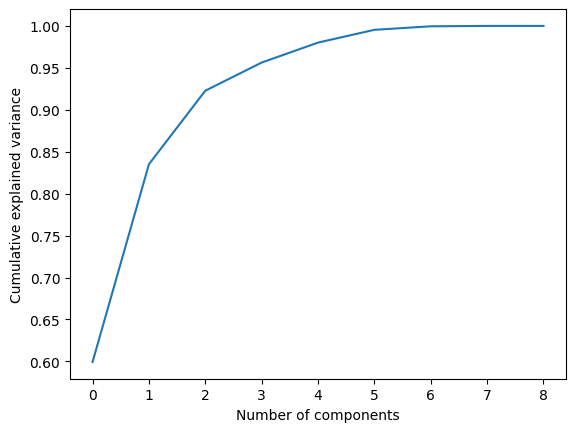

In [ ]:
# With 2 components we can explain more than 90% of the data
comps_to_keep = 3
print("The explained variance of the first", comps_to_keep ,"components is: ", sum(pca.explained_variance_ratio_[:comps_to_keep]))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import linear_model

In [ ]:
def calc_mse_mae(preds, y_test):
    MSE=mean_squared_error(preds, y_test)
    MAE=mean_absolute_error(preds, y_test)
    print('Mean squared Error: ', MSE, ' Mean Absolute Error: ', MAE)

Mean squared Error:  1.2485979051651033  Mean Absolute Error:  0.767241612888531
Coefficients: [[0.00754241]]


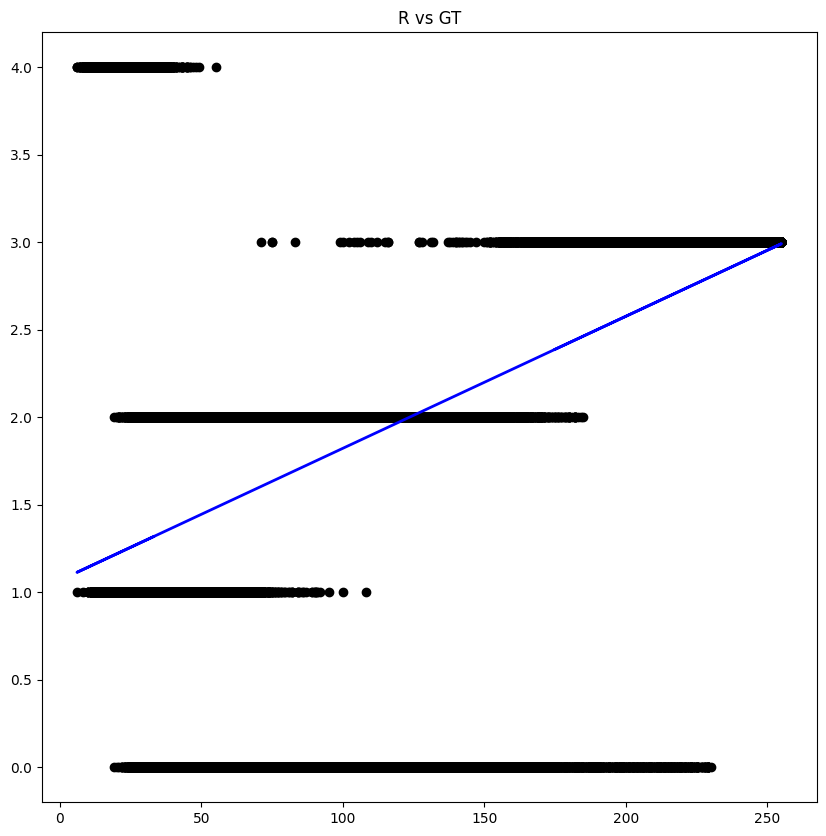

Mean squared Error:  1.3892218106541065  Mean Absolute Error:  0.8926777478756758
Coefficients: [[0.00747125]]


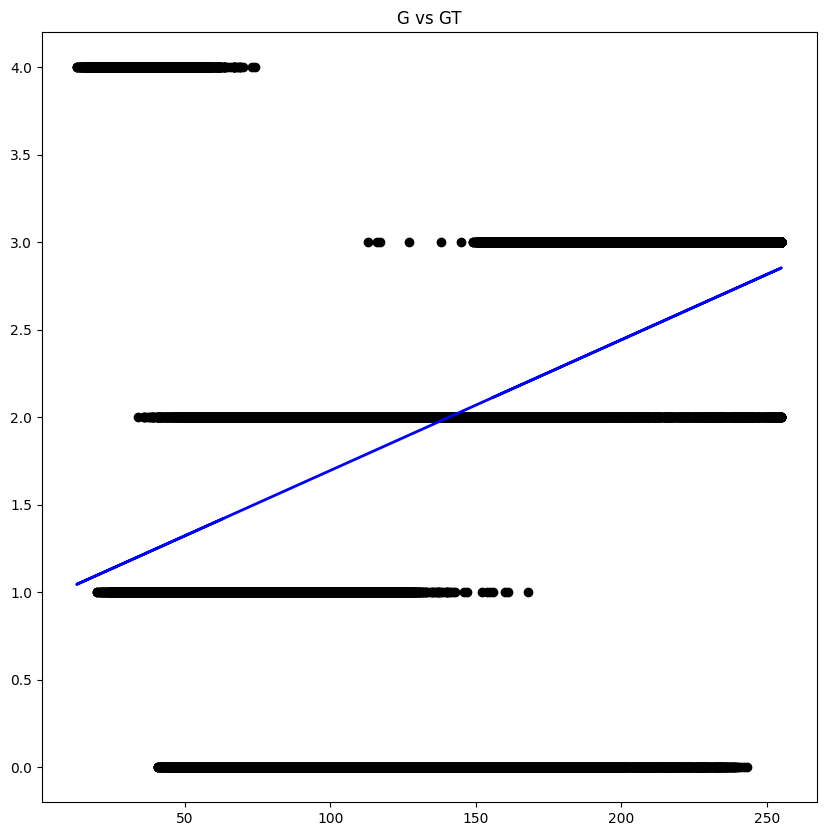

Mean squared Error:  1.5633610166461587  Mean Absolute Error:  1.0563983482990762
Coefficients: [[0.0046331]]


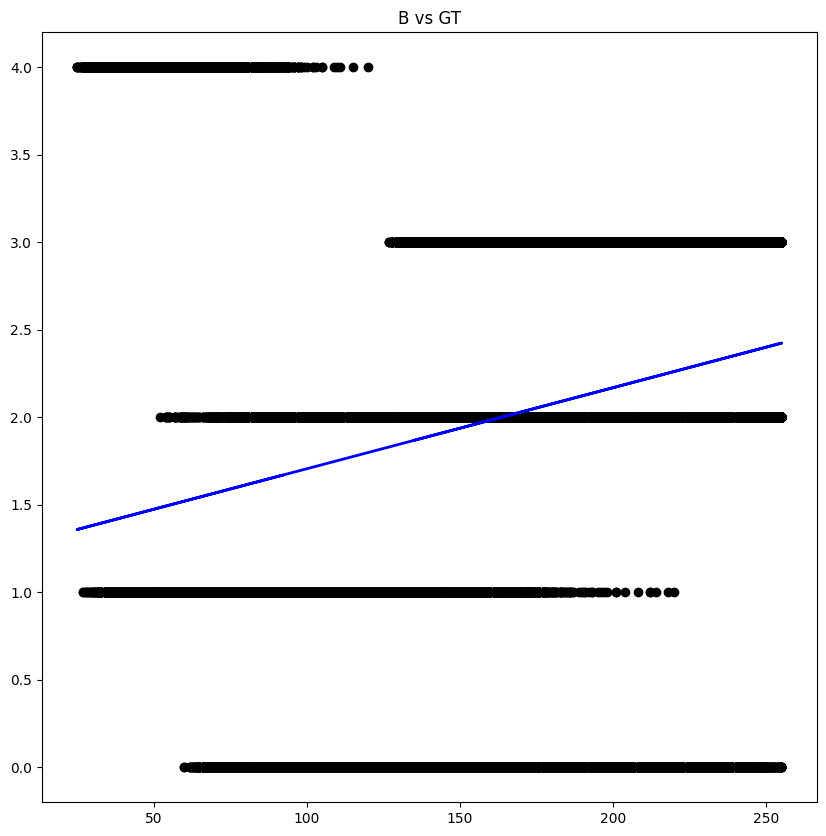

Mean squared Error:  1.3313343720802584  Mean Absolute Error:  0.9241018898534238
Coefficients: [[0.00564104]]


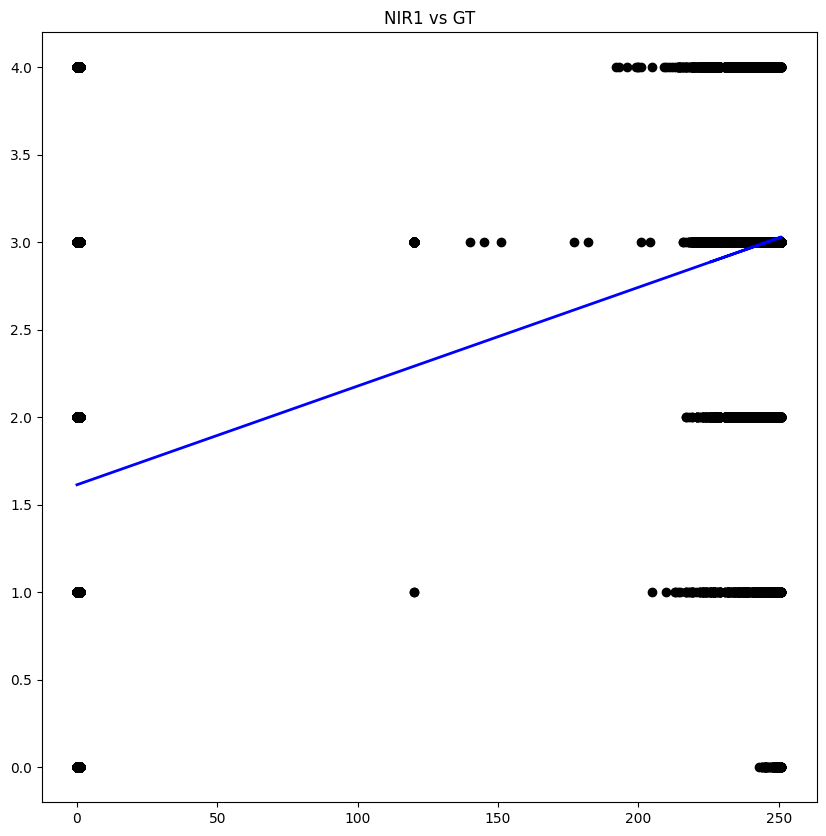

Mean squared Error:  1.476216332846937  Mean Absolute Error:  1.000080765831315
Coefficients: [[0.00635318]]


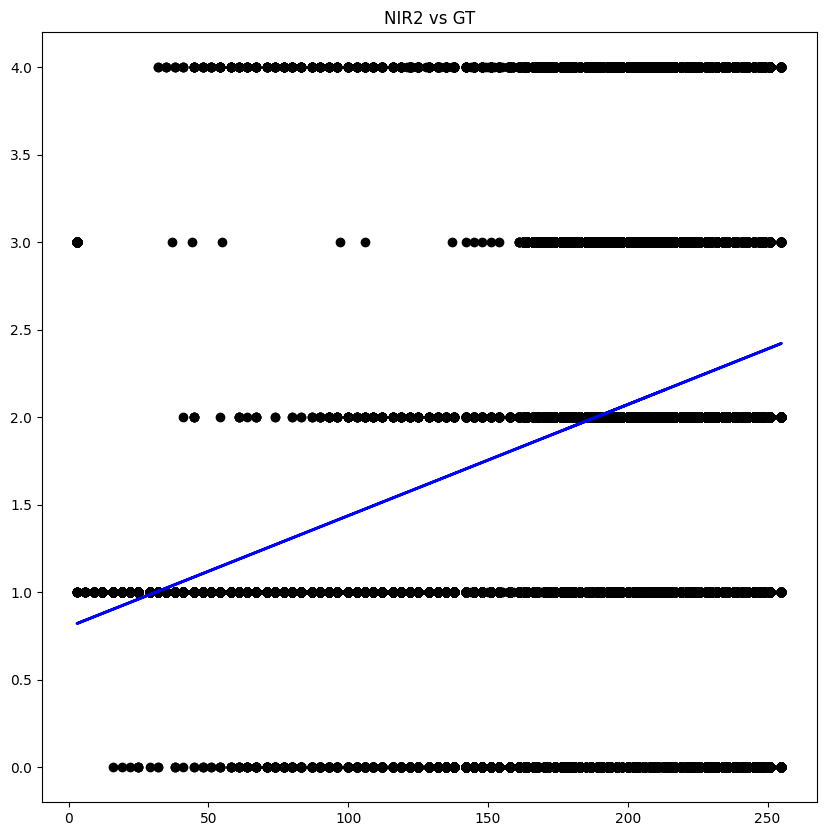

Mean squared Error:  0.9634385389289054  Mean Absolute Error:  0.6541299335282468
Coefficients: [[-0.00774155]]


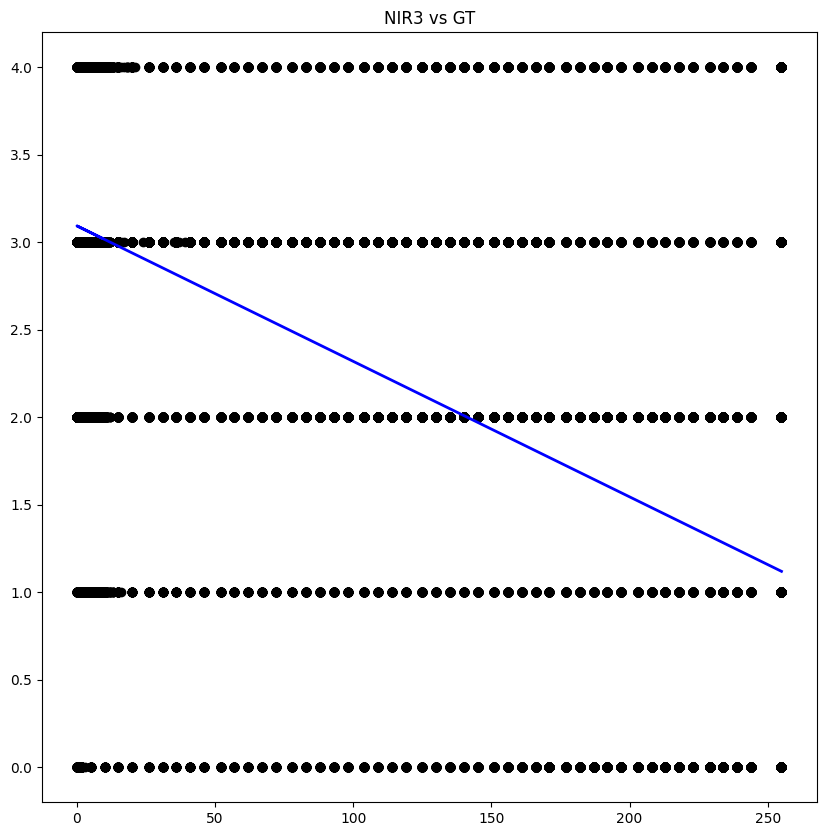

Mean squared Error:  1.2476000275841095  Mean Absolute Error:  0.8278539156198854
Coefficients: [[0.00601867]]


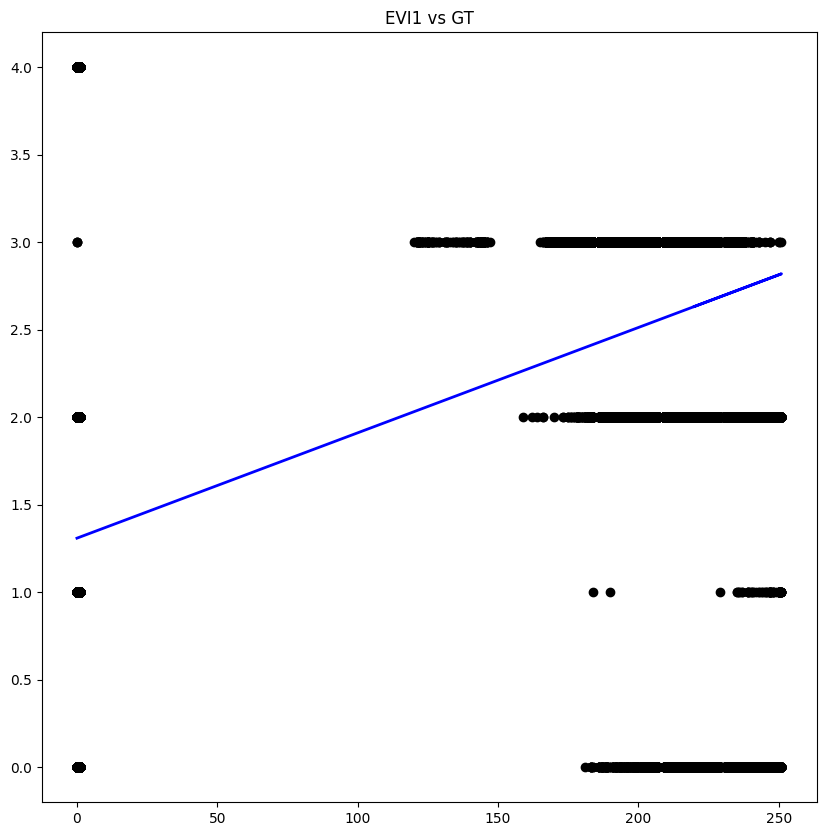

Mean squared Error:  1.3587478430681745  Mean Absolute Error:  0.9719249777499375
Coefficients: [[-0.01145637]]


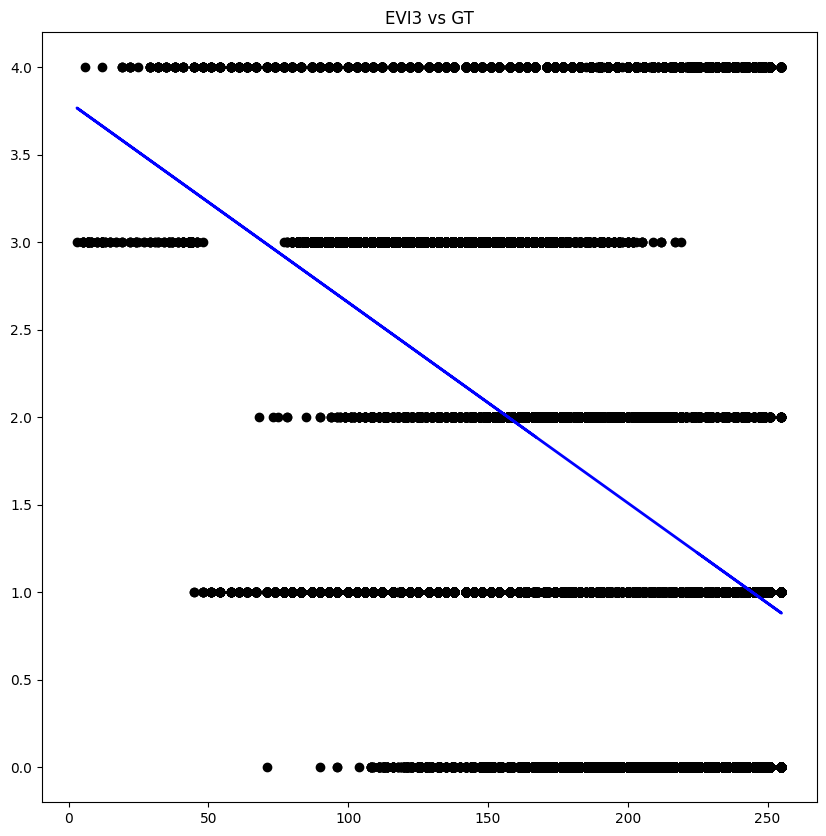

Mean squared Error:  1.3701292687397315  Mean Absolute Error:  0.8883412331067093
Coefficients: [[-0.00453917]]


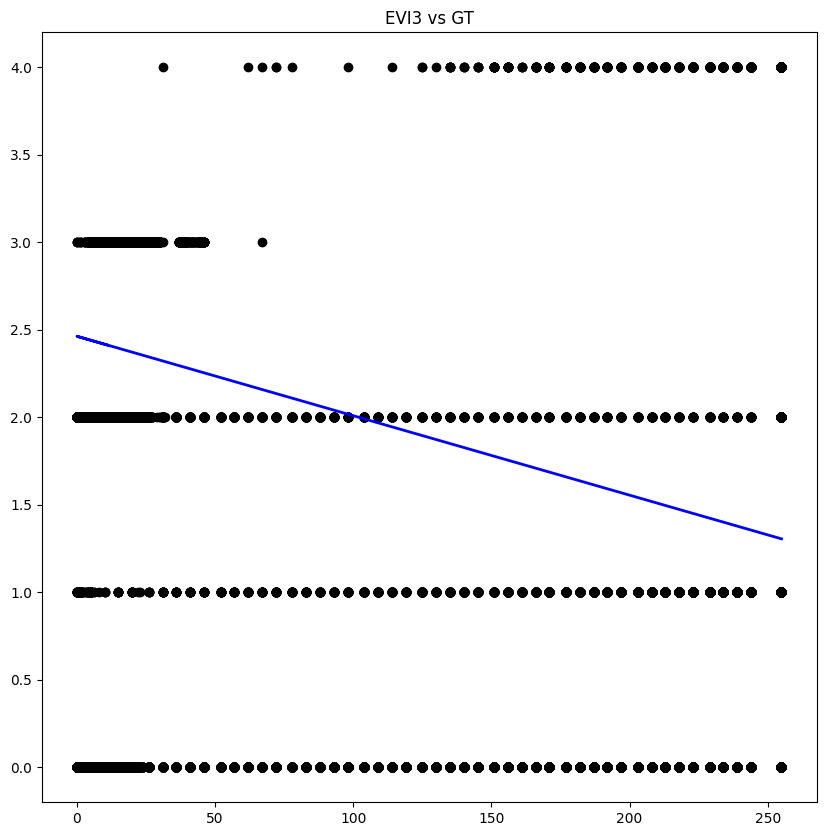

In [ ]:
features = ['R','G', 'B', 'NIR1', 'NIR2', 'NIR3','EVI1','EVI3','EVI3']
Y = matrix_pca[-1, :]
model= linear_model.LinearRegression()

for i, feat in enumerate(features):
  if len(features) == X.shape[0]:
      X_train, X_test, y_train, y_test = train_test_split(np.transpose(X[i,:]), np.squeeze(Y), test_size=0.2, random_state=1234)
      X_train = X_train.reshape(-1,1)
      y_train = y_train.reshape(-1,1)
      trained_model=model.fit(X_train, y_train)
      X_test = X_test.reshape(-1,1)
      predictions = trained_model.predict(X_test)

      calc_mse_mae(predictions, y_test)
      print(f"Coefficients: {trained_model.coef_}")

      plt.figure(figsize=(10, 10))
      plt.scatter(X_test, np.squeeze(y_test), color="black")
      plt.plot(X_test, predictions, color="blue", linewidth=2)
      plt.title(f"{feat} vs GT")
      plt.show()

In [ ]:
 X.shape[0]

9

In [ ]:
from sklearn.preprocessing import MinMaxScaler

hypercube_bands_scaled = np.zeros((hypercube.shape[0], hypercube.shape[1], hypercube.shape[2]-1))

def scale_bands(hypercube):

  scaler = MinMaxScaler(feature_range=(0, 1))

  for i in range(hypercube.shape[-1]-1):
    band = hypercube[:, :, i]
    band_scaled = scaler.fit_transform(band.reshape(-1, 1)).reshape(band.shape)
    hypercube_bands_scaled[:, :, i] = band_scaled
  
  return hypercube_bands_scaled


In [ ]:
hypercube_bands_scaled = scale_bands(hypercube)
hypercube_bands_scaled.shape

(487, 880, 9)

In [ ]:
from sklearn.decomposition import PCA

def pca(hypercube_bands, n_comp = 2):
  bands_2d = hypercube_bands.reshape(-1, hypercube_bands.shape[2]) 
  pca = PCA(n_components=n_comp).fit(bands_2d)
  bands_pca = pca.transform(bands_2d)
  bands_pca = bands_pca.reshape(hypercube_bands.shape[0], hypercube_bands.shape[1], -1)
  explained_variance = pca.explained_variance_ratio_
  print("The explained variance of the first", n_comp ,"components is: ",explained_variance)

  return  bands_pca

In [ ]:
bands_pca = pca(hypercube_bands_scaled, n_comp=9)
bands_pca.shape

The explained variance of the first 9 components is:  [6.77846830e-01 1.57514225e-01 6.45631781e-02 3.62875163e-02
 2.84847132e-02 1.72839297e-02 1.39679050e-02 3.71830040e-03
 3.33402424e-04]


(487, 880, 9)

### This is what we should use, and we have to apply the same transformation to all images and then use the descriptor, which are the combination of the 3 most relevant bands of the pca.

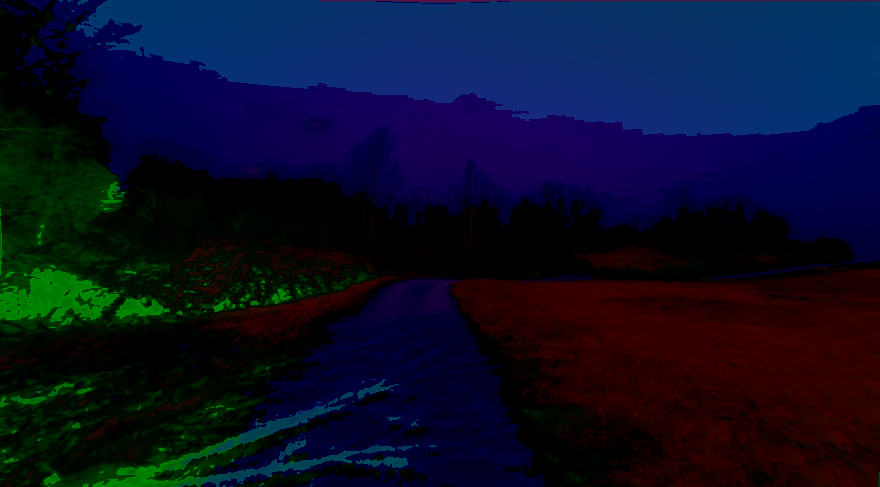

In [ ]:
cv2_imshow(bands_pca[:,:,:3]*100)

In [ ]:
def get_hypercube(gt_file, bands_to_append):
    hypercube = gt_file
    for band in bands_to_append:
      hypercube = append_bands_hypercube(hypercube,band)

    return hypercube

In [ ]:
rgb_path = "/content/gdrive/MyDrive/datasets_lsma/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/rgb/"
nir_path = "/content/gdrive/MyDrive/datasets_lsma/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/nir_color/"
evi_path = "/content/gdrive/MyDrive/datasets_lsma/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/evi_color/"
path_gt_files = "/content/gdrive/MyDrive/datasets_lsma/LSMA_Final_Project/datasets/freiburg_forest_annotated/train/gt_files/"

gt_files = sorted(os.listdir(path_gt_files))
rgb_files = sorted(os.listdir(rgb_path))
nir_files = sorted(os.listdir(nir_path))
evi_files = sorted(os.listdir(evi_path))

hypercubes_list = []

for idx in range(50):
      gt_file = gt_files[idx]
      bands_to_append = []
      gt = np.load(os.path.join(path_gt_files, gt_file)) 
      rgb = cv2.imread(f"{rgb_path}{rgb_files[idx]}")
      nir = cv2.imread(f"{nir_path}{nir_files[idx]}")
      evi = cv2.imread(f"{evi_path}{evi_files[idx]}")

      for i in range(rgb.shape[2]):
        bands_to_append.append(rgb[:,:,i])
      for i in range(rgb.shape[2]):
        bands_to_append.append(nir[:,:,i])
      for i in range(rgb.shape[2]):
        bands_to_append.append(evi[:,:,i])

      hypercube = get_hypercube(gt, bands_to_append)
      hypercubes_list.append(hypercube)



percentage of pixels over all images

In [ ]:
pixel_values = [0, 1, 2, 3, 4]

pixel_counts = {p: 0 for p in pixel_values}

for gt_file in os.listdir(path_gt_files):
    gt = np.load(os.path.join(path_gt_files, gt_file)) 
    for p in pixel_values:
        pixel_counts[p] += np.sum(gt == p)

total_pixels = sum(pixel_counts.values())

for p in pixel_values:
    percent_pixels_per_class = 100 * pixel_counts[p] / total_pixels
    print("{:.2f}% of total pixels in class {}".format(percent_pixels_per_class, p))


39.58% of total pixels in class 0
26.19% of total pixels in class 1
9.61% of total pixels in class 2
23.29% of total pixels in class 3
1.33% of total pixels in class 4


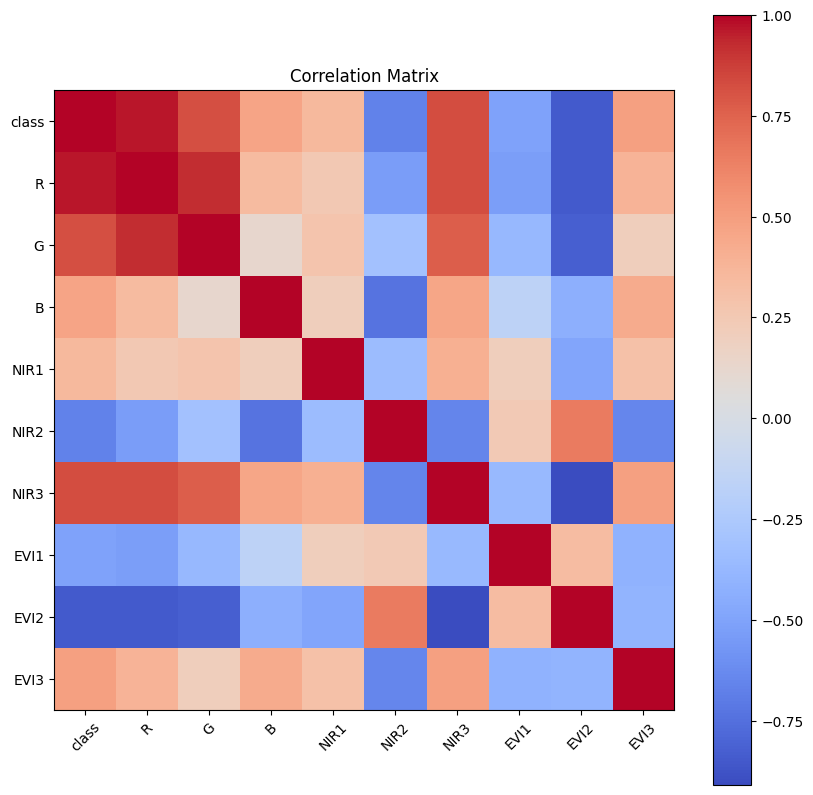

In [ ]:
features = ['class', 'R', 'G', 'B', 'NIR1', 'NIR2', 'NIR3', 'EVI1', 'EVI2', 'EVI3']
hypercube = hypercubes_list[0]
matrix_pca = matricization_mode_3(hypercube)
corr_matrix = np.corrcoef(matrix_pca)

plt.figure(figsize=(10, 10))
plt.imshow(corr_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(features)), features, rotation=45)
plt.yticks(range(len(features)), features)
plt.title('Correlation Matrix')
plt.show()


Shape of matrix is (10, 413470)


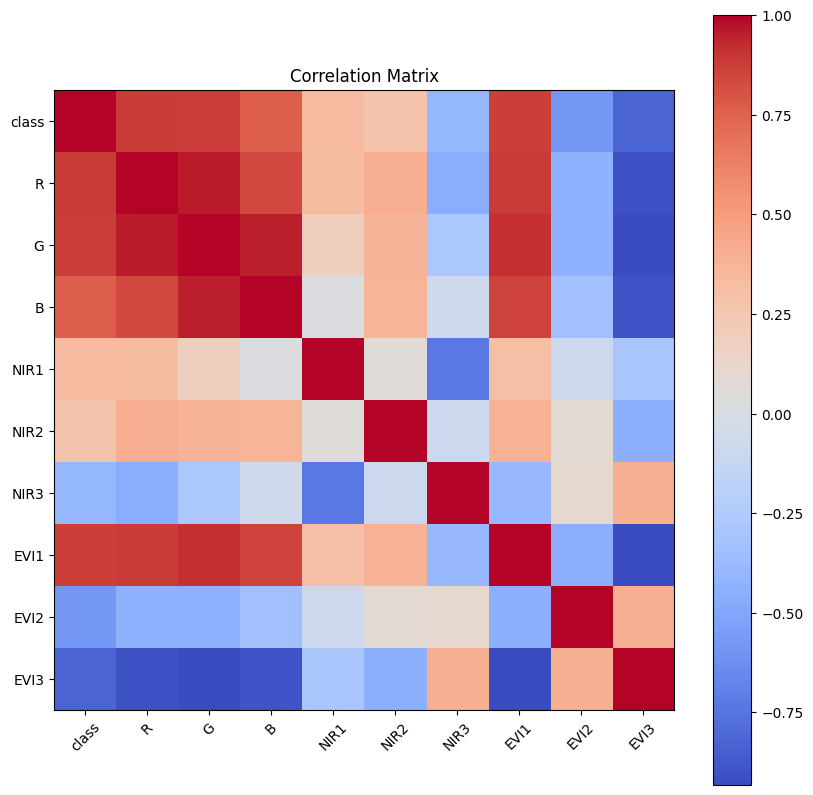

In [ ]:
features = ['class', 'R', 'G', 'B', 'NIR1', 'NIR2', 'NIR3', 'EVI1', 'EVI2', 'EVI3']
hypercube = hypercubes_list[25]
matrix_pca = matricization_mode_3(hypercube)
corr_matrix = np.corrcoef(matrix_pca)

plt.figure(figsize=(10, 10))
plt.imshow(corr_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(features)), features, rotation=45)
plt.yticks(range(len(features)), features)
plt.title('Correlation Matrix')
plt.show()


PCA over 50 images

In [ ]:
matrices_pca_list = []
for elem in hypercubes_list:
  matrix_pca = matricization_mode_3(elem)
  matrices_pca_list.append(matrix_pca)

images_pca = np.hstack(matrices_pca_list)

In [ ]:
images_pca.shape

(10, 20903190)

In [ ]:
std_slc = StandardScaler()

X = images_pca[1:, :]
std_slc.fit(X)
X_scaled = std_slc.transform(X)
n_components = images_pca.shape[0] - 1
pca = decomposition.PCA(n_components=n_components)
X_std_pca = pca.fit(X_scaled)

The explained variance of the first 3 components is:  0.9184990128946068


Text(0, 0.5, 'Cumulative explained variance')

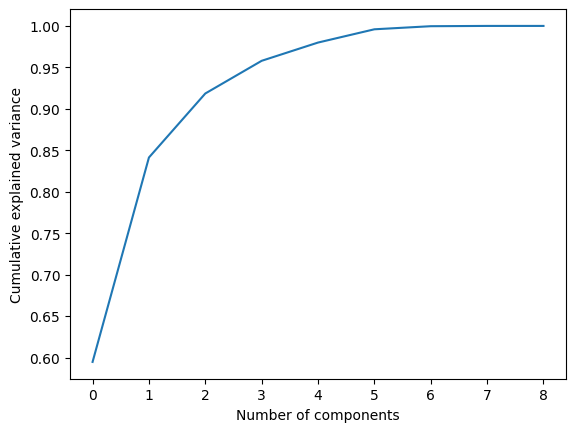

In [ ]:
comps_to_keep = 3
print("The explained variance of the first", comps_to_keep ,"components is: ", sum(pca.explained_variance_ratio_[:comps_to_keep]))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

corr matrix over 50 images

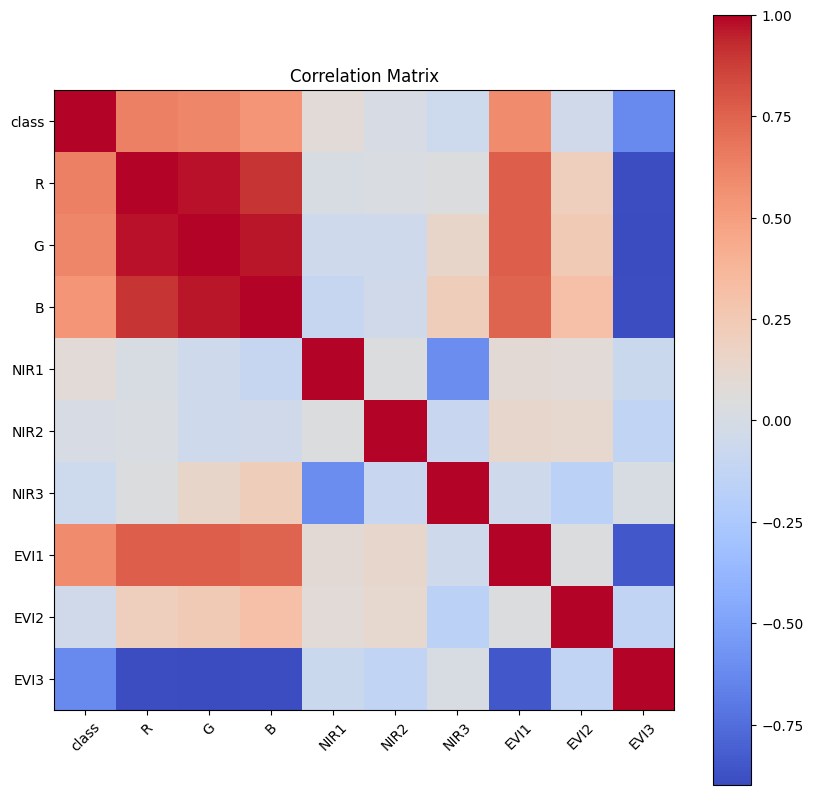

In [ ]:
matrices_pca_list = []
for elem in hypercubes_list:
  matrix_pca = matricization_mode_3(elem)
  matrices_pca_list.append(matrix_pca)

images_pca = np.hstack(matrices_pca_list)

features = ['class', 'R', 'G', 'B', 'NIR1', 'NIR2', 'NIR3', 'EVI1', 'EVI2', 'EVI3']

corr_matrix = np.corrcoef(images_pca)

plt.figure(figsize=(10, 10))
plt.imshow(corr_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(features)), features, rotation=45)
plt.yticks(range(len(features)), features)
plt.title('Correlation Matrix')
plt.show()


